Text(0.5, 1.0, 'original image')

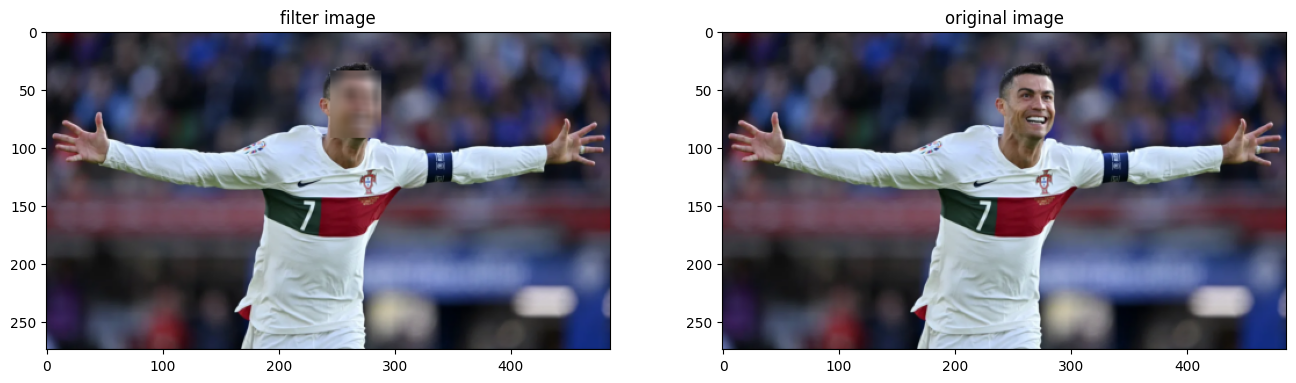

In [50]:
import cv2 as cv
import matplotlib.pyplot as plt

model_path = 'res10_300x300_ssd_iter_140000_fp16.caffemodel'
config_path = 'deploy.prototxt'
net = cv.dnn.readNetFromCaffe(config_path, model_path)

image = cv.imread('x.png')
image_org = cv.imread('x.png')

h, w, _ = image.shape


blob = cv.dnn.blobFromImage(image, 1.0, (300, 300), [104.0, 177.0, 123.0], False, False)

net.setInput(blob)
    
detections = net.forward()




for i in detections[0][0]: 
    if i[2] > 0.5:
        x1 = int(i[3] * w)
        y1 = int(i[4] * h)
        x2 = int(i[5] * w)
        y2 = int(i[6] * h)
        crop_image = image[y1 : y2, x1 : x2]
        crop_image_blur =  cv.blur(crop_image, (14, 14))
        image[y1 : y2, x1 : x2] = crop_image_blur
            
            


plt.figure(figsize=[16,9])
plt.subplot(121)
plt.imshow(image[...,::-1])
plt.title('filter image')
plt.subplot(122)
plt.imshow(image_org[...,::-1])
plt.title('original image')